In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam 

import shutil
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from sklearn.model_selection import StratifiedShuffleSplit

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Model

from keras.callbacks import EarlyStopping
early_stoping = EarlyStopping(patience=7)


In [80]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'e:/smallclass/train/',
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'e:/smallclass/test/',
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'

)

val_generator = val_datagen.flow_from_directory(
    'e:/smallclass/val/',
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'

)

Found 18134 images belonging to 73 classes.
Found 6960 images belonging to 73 classes.
Found 6870 images belonging to 73 classes.


In [72]:
base_model=MobileNetV2(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
preds=Dense(183,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds) 

model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_16[0][0]']               
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                        

 block_2_add (Add)              (None, None, None,   0           ['block_1_project_BN[0][0]',     
                                24)                               'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, None, None,   3456        ['block_2_add[0][0]']            
                                144)                                                              
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, None, None,   576        ['block_3_expand[0][0]']         
 ization)                       144)                                                              
                                                                                                  
 block_3_expand_relu (ReLU)     (None, None, None,   0           ['block_3_expand_BN[0][0]']      
          

                                                                                                  
 block_6_expand (Conv2D)        (None, None, None,   6144        ['block_5_add[0][0]']            
                                192)                                                              
                                                                                                  
 block_6_expand_BN (BatchNormal  (None, None, None,   768        ['block_6_expand[0][0]']         
 ization)                       192)                                                              
                                                                                                  
 block_6_expand_relu (ReLU)     (None, None, None,   0           ['block_6_expand_BN[0][0]']      
                                192)                                                              
                                                                                                  
 block_6_p

                                384)                                                              
                                                                                                  
 block_9_expand_BN (BatchNormal  (None, None, None,   1536       ['block_9_expand[0][0]']         
 ization)                       384)                                                              
                                                                                                  
 block_9_expand_relu (ReLU)     (None, None, None,   0           ['block_9_expand_BN[0][0]']      
                                384)                                                              
                                                                                                  
 block_9_depthwise (DepthwiseCo  (None, None, None,   3456       ['block_9_expand_relu[0][0]']    
 nv2D)                          384)                                                              
          

 block_12_expand_relu (ReLU)    (None, None, None,   0           ['block_12_expand_BN[0][0]']     
                                576)                                                              
                                                                                                  
 block_12_depthwise (DepthwiseC  (None, None, None,   5184       ['block_12_expand_relu[0][0]']   
 onv2D)                         576)                                                              
                                                                                                  
 block_12_depthwise_BN (BatchNo  (None, None, None,   2304       ['block_12_depthwise[0][0]']     
 rmalization)                   576)                                                              
                                                                                                  
 block_12_depthwise_relu (ReLU)  (None, None, None,   0          ['block_12_depthwise_BN[0][0]']  
          

                                                                                                  
 block_15_depthwise (DepthwiseC  (None, None, None,   8640       ['block_15_expand_relu[0][0]']   
 onv2D)                         960)                                                              
                                                                                                  
 block_15_depthwise_BN (BatchNo  (None, None, None,   3840       ['block_15_depthwise[0][0]']     
 rmalization)                   960)                                                              
                                                                                                  
 block_15_depthwise_relu (ReLU)  (None, None, None,   0          ['block_15_depthwise_BN[0][0]']  
                                960)                                                              
                                                                                                  
 block_15_

In [73]:
# optimizer=Adam(learning_rate=.0005)
model.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
hist = model.fit(train_generator, epochs=100, steps_per_epoch= train_generator.samples//train_generator.batch_size,
                 validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size)

Epoch 1/100
2098/2098 [==============================] - 487s 231ms/step - loss: 4.2690 - accuracy: 0.0816 - val_loss: 15.0879 - val_accuracy: 0.0145
Epoch 2/100
2098/2098 [==============================] - 381s 182ms/step - loss: 2.6214 - accuracy: 0.3198 - val_loss: 14.0867 - val_accuracy: 0.0349
Epoch 3/100
2098/2098 [==============================] - 380s 181ms/step - loss: 1.6039 - accuracy: 0.5498 - val_loss: 7.3985 - val_accuracy: 0.1864
Epoch 4/100
2098/2098 [==============================] - 379s 181ms/step - loss: 1.1007 - accuracy: 0.6810 - val_loss: 4.2865 - val_accuracy: 0.3506
Epoch 5/100
2098/2098 [==============================] - 378s 180ms/step - loss: 0.8129 - accuracy: 0.7565 - val_loss: 2.6791 - val_accuracy: 0.5307
Epoch 6/100
2098/2098 [==============================] - 378s 180ms/step - loss: 0.6373 - accuracy: 0.8037 - val_loss: 3.7443 - val_accuracy: 0.4539
Epoch 7/100
2098/2098 [==============================] - 375s 179ms/step - loss: 0.5213 - accuracy: 0.84

2098/2098 [==============================] - 383s 183ms/step - loss: 0.0628 - accuracy: 0.9790 - val_loss: 2.0203 - val_accuracy: 0.7433
Epoch 56/100
2098/2098 [==============================] - 384s 183ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 1.8597 - val_accuracy: 0.7525
Epoch 57/100
2098/2098 [==============================] - 383s 183ms/step - loss: 0.0754 - accuracy: 0.9758 - val_loss: 2.3141 - val_accuracy: 0.7160
Epoch 58/100
2098/2098 [==============================] - 384s 183ms/step - loss: 0.0695 - accuracy: 0.9777 - val_loss: 2.0826 - val_accuracy: 0.7477
Epoch 59/100
2098/2098 [==============================] - 383s 183ms/step - loss: 0.0692 - accuracy: 0.9783 - val_loss: 2.3989 - val_accuracy: 0.7221
Epoch 60/100
2098/2098 [==============================] - 385s 183ms/step - loss: 0.0761 - accuracy: 0.9758 - val_loss: 2.1016 - val_accuracy: 0.7254
Epoch 61/100
2098/2098 [==============================] - 385s 183ms/step - loss: 0.0667 - accuracy: 0.9788 - val

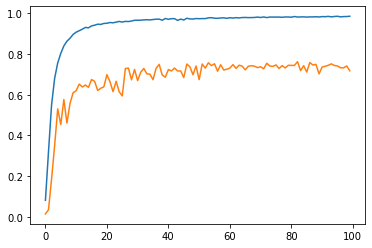

In [75]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

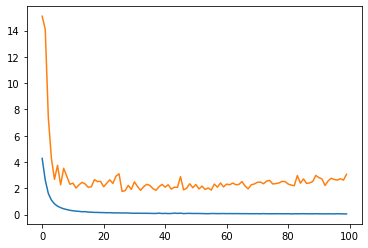

In [76]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])

In [77]:
model.evaluate(test_generator)

1058/1058 [==============================] - 160s 151ms/step - loss: 2.9042 - accuracy: 0.7325


[2.904170036315918, 0.7324756383895874]

In [78]:
model.save('models/mobilenet_v2/v2_4.h5', save_format='h5')

In [50]:
new_model = keras.models.load_model('models/mobilenet_v2/v2_2.h5')
new_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_12[0][0]']               
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                        

                                                                                                  
 block_3_expand (Conv2D)        (None, None, None,   3456        ['block_2_add[0][0]']            
                                144)                                                              
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, None, None,   576        ['block_3_expand[0][0]']         
 ization)                       144)                                                              
                                                                                                  
 block_3_expand_relu (ReLU)     (None, None, None,   0           ['block_3_expand_BN[0][0]']      
                                144)                                                              
                                                                                                  
 block_3_p

                                192)                                                              
                                                                                                  
 block_6_expand_BN (BatchNormal  (None, None, None,   768        ['block_6_expand[0][0]']         
 ization)                       192)                                                              
                                                                                                  
 block_6_expand_relu (ReLU)     (None, None, None,   0           ['block_6_expand_BN[0][0]']      
                                192)                                                              
                                                                                                  
 block_6_pad (ZeroPadding2D)    (None, None, None,   0           ['block_6_expand_relu[0][0]']    
                                192)                                                              
          

 block_9_expand_BN (BatchNormal  (None, None, None,   1536       ['block_9_expand[0][0]']         
 ization)                       384)                                                              
                                                                                                  
 block_9_expand_relu (ReLU)     (None, None, None,   0           ['block_9_expand_BN[0][0]']      
                                384)                                                              
                                                                                                  
 block_9_depthwise (DepthwiseCo  (None, None, None,   3456       ['block_9_expand_relu[0][0]']    
 nv2D)                          384)                                                              
                                                                                                  
 block_9_depthwise_BN (BatchNor  (None, None, None,   1536       ['block_9_depthwise[0][0]']      
 malizatio

                                                                                                  
 block_12_depthwise (DepthwiseC  (None, None, None,   5184       ['block_12_expand_relu[0][0]']   
 onv2D)                         576)                                                              
                                                                                                  
 block_12_depthwise_BN (BatchNo  (None, None, None,   2304       ['block_12_depthwise[0][0]']     
 rmalization)                   576)                                                              
                                                                                                  
 block_12_depthwise_relu (ReLU)  (None, None, None,   0          ['block_12_depthwise_BN[0][0]']  
                                576)                                                              
                                                                                                  
 block_12_

 onv2D)                         960)                                                              
                                                                                                  
 block_15_depthwise_BN (BatchNo  (None, None, None,   3840       ['block_15_depthwise[0][0]']     
 rmalization)                   960)                                                              
                                                                                                  
 block_15_depthwise_relu (ReLU)  (None, None, None,   0          ['block_15_depthwise_BN[0][0]']  
                                960)                                                              
                                                                                                  
 block_15_project (Conv2D)      (None, None, None,   153600      ['block_15_depthwise_relu[0][0]']
                                160)                                                              
          

In [28]:
new_model.evaluate(test_generator)

348/348 [==============================] - 35s 98ms/step - loss: 1.5882 - accuracy: 0.8020


[1.5882049798965454, 0.8020114898681641]

In [81]:
base_model=MobileNetV2(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
preds=Dense(73,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds) 

model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_17[0][0]']               
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                        

 block_2_add (Add)              (None, None, None,   0           ['block_1_project_BN[0][0]',     
                                24)                               'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, None, None,   3456        ['block_2_add[0][0]']            
                                144)                                                              
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, None, None,   576        ['block_3_expand[0][0]']         
 ization)                       144)                                                              
                                                                                                  
 block_3_expand_relu (ReLU)     (None, None, None,   0           ['block_3_expand_BN[0][0]']      
          

                                                                                                  
 block_6_expand (Conv2D)        (None, None, None,   6144        ['block_5_add[0][0]']            
                                192)                                                              
                                                                                                  
 block_6_expand_BN (BatchNormal  (None, None, None,   768        ['block_6_expand[0][0]']         
 ization)                       192)                                                              
                                                                                                  
 block_6_expand_relu (ReLU)     (None, None, None,   0           ['block_6_expand_BN[0][0]']      
                                192)                                                              
                                                                                                  
 block_6_p

                                384)                                                              
                                                                                                  
 block_9_expand_BN (BatchNormal  (None, None, None,   1536       ['block_9_expand[0][0]']         
 ization)                       384)                                                              
                                                                                                  
 block_9_expand_relu (ReLU)     (None, None, None,   0           ['block_9_expand_BN[0][0]']      
                                384)                                                              
                                                                                                  
 block_9_depthwise (DepthwiseCo  (None, None, None,   3456       ['block_9_expand_relu[0][0]']    
 nv2D)                          384)                                                              
          

 block_12_expand_relu (ReLU)    (None, None, None,   0           ['block_12_expand_BN[0][0]']     
                                576)                                                              
                                                                                                  
 block_12_depthwise (DepthwiseC  (None, None, None,   5184       ['block_12_expand_relu[0][0]']   
 onv2D)                         576)                                                              
                                                                                                  
 block_12_depthwise_BN (BatchNo  (None, None, None,   2304       ['block_12_depthwise[0][0]']     
 rmalization)                   576)                                                              
                                                                                                  
 block_12_depthwise_relu (ReLU)  (None, None, None,   0          ['block_12_depthwise_BN[0][0]']  
          

                                                                                                  
 block_15_depthwise (DepthwiseC  (None, None, None,   8640       ['block_15_expand_relu[0][0]']   
 onv2D)                         960)                                                              
                                                                                                  
 block_15_depthwise_BN (BatchNo  (None, None, None,   3840       ['block_15_depthwise[0][0]']     
 rmalization)                   960)                                                              
                                                                                                  
 block_15_depthwise_relu (ReLU)  (None, None, None,   0          ['block_15_depthwise_BN[0][0]']  
                                960)                                                              
                                                                                                  
 block_15_

In [87]:
optimizer= Adam (learning_rate=.0005)
model.compile(optimizer = optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [88]:
hist = model.fit(train_generator, epochs=100, steps_per_epoch= train_generator.samples//train_generator.batch_size,
                 validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size)

Epoch 1/100
906/906 [==============================] - 204s 222ms/step - loss: 1.6278 - accuracy: 0.5754 - val_loss: 6.4300 - val_accuracy: 0.2510
Epoch 2/100
906/906 [==============================] - 156s 172ms/step - loss: 0.4886 - accuracy: 0.8534 - val_loss: 5.5282 - val_accuracy: 0.2716
Epoch 3/100
906/906 [==============================] - 156s 173ms/step - loss: 0.3247 - accuracy: 0.9007 - val_loss: 2.9027 - val_accuracy: 0.4838
Epoch 4/100
906/906 [==============================] - 157s 172ms/step - loss: 0.2788 - accuracy: 0.9164 - val_loss: 2.2102 - val_accuracy: 0.6258
Epoch 5/100
906/906 [==============================] - 158s 174ms/step - loss: 0.2415 - accuracy: 0.9232 - val_loss: 3.4743 - val_accuracy: 0.4733
Epoch 6/100
906/906 [==============================] - 157s 174ms/step - loss: 0.2059 - accuracy: 0.9362 - val_loss: 1.9132 - val_accuracy: 0.6669
Epoch 7/100
906/906 [==============================] - 157s 174ms/step - loss: 0.2201 - accuracy: 0.9304 - val_loss: 2

906/906 [==============================] - 158s 174ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.8423 - val_accuracy: 0.8515
Epoch 57/100
906/906 [==============================] - 158s 174ms/step - loss: 0.0453 - accuracy: 0.9865 - val_loss: 0.9086 - val_accuracy: 0.8427
Epoch 58/100
906/906 [==============================] - 157s 173ms/step - loss: 0.0435 - accuracy: 0.9877 - val_loss: 1.0065 - val_accuracy: 0.8379
Epoch 59/100
906/906 [==============================] - 158s 174ms/step - loss: 0.0534 - accuracy: 0.9859 - val_loss: 1.1237 - val_accuracy: 0.7867
Epoch 60/100
906/906 [==============================] - 158s 174ms/step - loss: 0.0520 - accuracy: 0.9850 - val_loss: 1.1480 - val_accuracy: 0.7977
Epoch 61/100
906/906 [==============================] - 157s 173ms/step - loss: 0.0397 - accuracy: 0.9893 - val_loss: 0.8907 - val_accuracy: 0.8434
Epoch 62/100
906/906 [==============================] - 157s 174ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 1.1281 

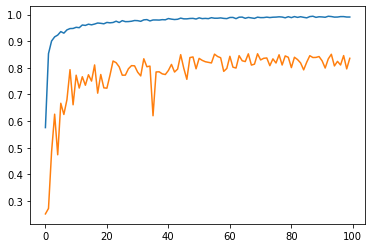

In [89]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

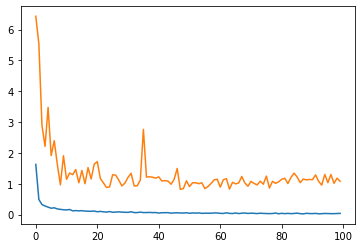

In [90]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])

In [91]:
model.evaluate(test_generator)

348/348 [==============================] - 51s 146ms/step - loss: 1.1177 - accuracy: 0.8326


[1.1177177429199219, 0.8326149582862854]

In [92]:
model.save('models/mobilenet_v2/v2_5.h5', save_format='h5')

In [93]:
base_model=MobileNetV2(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
preds=Dense(73,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds) 

model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_18[0][0]']               
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                        

 block_2_add (Add)              (None, None, None,   0           ['block_1_project_BN[0][0]',     
                                24)                               'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, None, None,   3456        ['block_2_add[0][0]']            
                                144)                                                              
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, None, None,   576        ['block_3_expand[0][0]']         
 ization)                       144)                                                              
                                                                                                  
 block_3_expand_relu (ReLU)     (None, None, None,   0           ['block_3_expand_BN[0][0]']      
          

                                                                                                  
 block_6_expand (Conv2D)        (None, None, None,   6144        ['block_5_add[0][0]']            
                                192)                                                              
                                                                                                  
 block_6_expand_BN (BatchNormal  (None, None, None,   768        ['block_6_expand[0][0]']         
 ization)                       192)                                                              
                                                                                                  
 block_6_expand_relu (ReLU)     (None, None, None,   0           ['block_6_expand_BN[0][0]']      
                                192)                                                              
                                                                                                  
 block_6_p

                                384)                                                              
                                                                                                  
 block_9_expand_BN (BatchNormal  (None, None, None,   1536       ['block_9_expand[0][0]']         
 ization)                       384)                                                              
                                                                                                  
 block_9_expand_relu (ReLU)     (None, None, None,   0           ['block_9_expand_BN[0][0]']      
                                384)                                                              
                                                                                                  
 block_9_depthwise (DepthwiseCo  (None, None, None,   3456       ['block_9_expand_relu[0][0]']    
 nv2D)                          384)                                                              
          

 block_12_expand_relu (ReLU)    (None, None, None,   0           ['block_12_expand_BN[0][0]']     
                                576)                                                              
                                                                                                  
 block_12_depthwise (DepthwiseC  (None, None, None,   5184       ['block_12_expand_relu[0][0]']   
 onv2D)                         576)                                                              
                                                                                                  
 block_12_depthwise_BN (BatchNo  (None, None, None,   2304       ['block_12_depthwise[0][0]']     
 rmalization)                   576)                                                              
                                                                                                  
 block_12_depthwise_relu (ReLU)  (None, None, None,   0          ['block_12_depthwise_BN[0][0]']  
          

                                                                                                  
 block_15_depthwise (DepthwiseC  (None, None, None,   8640       ['block_15_expand_relu[0][0]']   
 onv2D)                         960)                                                              
                                                                                                  
 block_15_depthwise_BN (BatchNo  (None, None, None,   3840       ['block_15_depthwise[0][0]']     
 rmalization)                   960)                                                              
                                                                                                  
 block_15_depthwise_relu (ReLU)  (None, None, None,   0          ['block_15_depthwise_BN[0][0]']  
                                960)                                                              
                                                                                                  
 block_15_

In [94]:
optimizer= Adam (learning_rate=.0003)
model.compile(optimizer = optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [95]:
hist = model.fit(train_generator, epochs=100, steps_per_epoch= train_generator.samples//train_generator.batch_size,
                 validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size)

Epoch 1/100
906/906 [==============================] - 162s 176ms/step - loss: 1.3261 - accuracy: 0.6643 - val_loss: 3.6968 - val_accuracy: 0.3781
Epoch 2/100
906/906 [==============================] - 157s 174ms/step - loss: 0.3112 - accuracy: 0.9050 - val_loss: 1.1190 - val_accuracy: 0.7415
Epoch 3/100
906/906 [==============================] - 156s 172ms/step - loss: 0.2226 - accuracy: 0.9288 - val_loss: 1.2517 - val_accuracy: 0.7427
Epoch 4/100
906/906 [==============================] - 155s 171ms/step - loss: 0.1728 - accuracy: 0.9449 - val_loss: 1.6350 - val_accuracy: 0.7004
Epoch 5/100
906/906 [==============================] - 155s 171ms/step - loss: 0.1581 - accuracy: 0.9489 - val_loss: 1.2587 - val_accuracy: 0.7652
Epoch 6/100
906/906 [==============================] - 156s 172ms/step - loss: 0.1488 - accuracy: 0.9531 - val_loss: 1.3294 - val_accuracy: 0.7449
Epoch 7/100
906/906 [==============================] - 155s 171ms/step - loss: 0.1259 - accuracy: 0.9570 - val_loss: 1

906/906 [==============================] - 156s 172ms/step - loss: 0.0346 - accuracy: 0.9913 - val_loss: 0.9993 - val_accuracy: 0.8226
Epoch 57/100
906/906 [==============================] - 156s 172ms/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.8824 - val_accuracy: 0.8257
Epoch 58/100
906/906 [==============================] - 155s 171ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 1.0417 - val_accuracy: 0.8184
Epoch 59/100
906/906 [==============================] - 155s 172ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.7695 - val_accuracy: 0.8768
Epoch 60/100
906/906 [==============================] - 155s 171ms/step - loss: 0.0338 - accuracy: 0.9916 - val_loss: 0.9403 - val_accuracy: 0.8274
Epoch 61/100
906/906 [==============================] - 155s 171ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 1.2173 - val_accuracy: 0.7987
Epoch 62/100
906/906 [==============================] - 156s 172ms/step - loss: 0.0369 - accuracy: 0.9909 - val_loss: 1.1146 

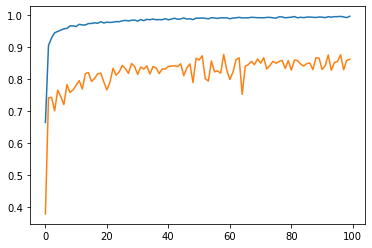

In [96]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

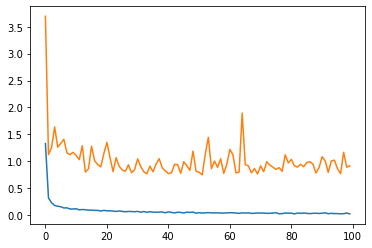

In [97]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])

In [98]:
model.evaluate(test_generator)

348/348 [==============================] - 36s 102ms/step - loss: 0.9840 - accuracy: 0.8589


[0.9840381741523743, 0.8589080572128296]

In [99]:
model.save('models/mobilenet_v2/v2_6.h5', save_format='h5')

In [100]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'e:/smallsize_183/train/',
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'e:/smallsize_183/test/',
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'

)

val_generator = val_datagen.flow_from_directory(
    'e:/smallsize_183/val/',
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'

)

Found 41965 images belonging to 183 classes.
Found 21142 images belonging to 183 classes.
Found 20702 images belonging to 183 classes.


In [101]:
base_model=MobileNetV2(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
preds=Dense(183,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds) 

model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_19[0][0]']               
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                        

 block_2_add (Add)              (None, None, None,   0           ['block_1_project_BN[0][0]',     
                                24)                               'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, None, None,   3456        ['block_2_add[0][0]']            
                                144)                                                              
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, None, None,   576        ['block_3_expand[0][0]']         
 ization)                       144)                                                              
                                                                                                  
 block_3_expand_relu (ReLU)     (None, None, None,   0           ['block_3_expand_BN[0][0]']      
          

                                                                                                  
 block_6_expand (Conv2D)        (None, None, None,   6144        ['block_5_add[0][0]']            
                                192)                                                              
                                                                                                  
 block_6_expand_BN (BatchNormal  (None, None, None,   768        ['block_6_expand[0][0]']         
 ization)                       192)                                                              
                                                                                                  
 block_6_expand_relu (ReLU)     (None, None, None,   0           ['block_6_expand_BN[0][0]']      
                                192)                                                              
                                                                                                  
 block_6_p

                                384)                                                              
                                                                                                  
 block_9_expand_BN (BatchNormal  (None, None, None,   1536       ['block_9_expand[0][0]']         
 ization)                       384)                                                              
                                                                                                  
 block_9_expand_relu (ReLU)     (None, None, None,   0           ['block_9_expand_BN[0][0]']      
                                384)                                                              
                                                                                                  
 block_9_depthwise (DepthwiseCo  (None, None, None,   3456       ['block_9_expand_relu[0][0]']    
 nv2D)                          384)                                                              
          

 block_12_expand_relu (ReLU)    (None, None, None,   0           ['block_12_expand_BN[0][0]']     
                                576)                                                              
                                                                                                  
 block_12_depthwise (DepthwiseC  (None, None, None,   5184       ['block_12_expand_relu[0][0]']   
 onv2D)                         576)                                                              
                                                                                                  
 block_12_depthwise_BN (BatchNo  (None, None, None,   2304       ['block_12_depthwise[0][0]']     
 rmalization)                   576)                                                              
                                                                                                  
 block_12_depthwise_relu (ReLU)  (None, None, None,   0          ['block_12_depthwise_BN[0][0]']  
          

                                                                                                  
 block_15_depthwise (DepthwiseC  (None, None, None,   8640       ['block_15_expand_relu[0][0]']   
 onv2D)                         960)                                                              
                                                                                                  
 block_15_depthwise_BN (BatchNo  (None, None, None,   3840       ['block_15_depthwise[0][0]']     
 rmalization)                   960)                                                              
                                                                                                  
 block_15_depthwise_relu (ReLU)  (None, None, None,   0          ['block_15_depthwise_BN[0][0]']  
                                960)                                                              
                                                                                                  
 block_15_

In [102]:
optimizer= Adam (learning_rate=.0003)
model.compile(optimizer = optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [103]:
hist = model.fit(train_generator, epochs=100, steps_per_epoch= train_generator.samples//train_generator.batch_size,
                 validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size)

Epoch 1/100
2098/2098 [==============================] - 508s 241ms/step - loss: 1.7869 - accuracy: 0.5745 - val_loss: 3.8893 - val_accuracy: 0.3934
Epoch 2/100
2098/2098 [==============================] - 392s 187ms/step - loss: 0.4719 - accuracy: 0.8598 - val_loss: 1.4906 - val_accuracy: 0.6661
Epoch 3/100
2098/2098 [==============================] - 393s 187ms/step - loss: 0.3284 - accuracy: 0.8992 - val_loss: 1.2023 - val_accuracy: 0.7262
Epoch 4/100
2098/2098 [==============================] - 391s 186ms/step - loss: 0.2594 - accuracy: 0.9172 - val_loss: 1.2524 - val_accuracy: 0.7375
Epoch 5/100
2098/2098 [==============================] - 388s 185ms/step - loss: 0.2163 - accuracy: 0.9310 - val_loss: 1.1170 - val_accuracy: 0.7515
Epoch 6/100
2098/2098 [==============================] - 464s 221ms/step - loss: 0.1909 - accuracy: 0.9390 - val_loss: 1.1299 - val_accuracy: 0.7692
Epoch 7/100
2098/2098 [==============================] - 430s 205ms/step - loss: 0.1680 - accuracy: 0.9465

2098/2098 [==============================] - 391s 186ms/step - loss: 0.0421 - accuracy: 0.9875 - val_loss: 1.2565 - val_accuracy: 0.8269
Epoch 56/100
2098/2098 [==============================] - 391s 186ms/step - loss: 0.0418 - accuracy: 0.9882 - val_loss: 1.2809 - val_accuracy: 0.8163
Epoch 57/100
2098/2098 [==============================] - 391s 186ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 1.0966 - val_accuracy: 0.8329
Epoch 58/100
2098/2098 [==============================] - 391s 186ms/step - loss: 0.0432 - accuracy: 0.9877 - val_loss: 1.2608 - val_accuracy: 0.8305
Epoch 59/100
2098/2098 [==============================] - 392s 187ms/step - loss: 0.0387 - accuracy: 0.9890 - val_loss: 1.1631 - val_accuracy: 0.8251
Epoch 60/100
2098/2098 [==============================] - 394s 188ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 1.2151 - val_accuracy: 0.8208
Epoch 61/100
2098/2098 [==============================] - 393s 187ms/step - loss: 0.0374 - accuracy: 0.9889 - val

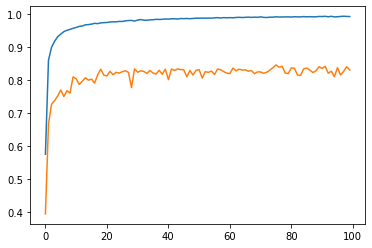

In [104]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

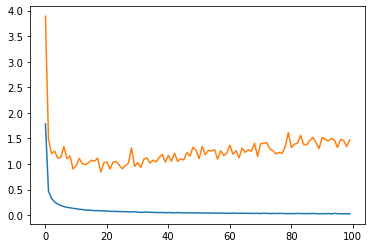

In [105]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])

In [106]:
model.evaluate(test_generator)

1058/1058 [==============================] - 161s 152ms/step - loss: 1.3163 - accuracy: 0.8351


[1.316282033920288, 0.835067629814148]

In [107]:
model.save('models/mobilenet_v2/v2_7.h5', save_format='h5')

In [ ]:
base_model=MobileNetV2(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(73,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds) 

model.summary()